In [31]:
!pip install textblob
import textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
import tweepy as tw
from textblob import TextBlob

In [92]:
consumer_key= 'insert'
consumer_secret= 'insert'
access_token= 'insert'
access_token_secret= 'insert'

In [34]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [35]:
public_tweets = api.search('eBay Love Island')

In [ ]:
for tweet in public_tweets:
  print(tweet.text)
  analysis = TextBlob(tweet.text)
  print(analysis.sentiment)

In [ ]:
#Try to extract 100 tweets from my eBay Love Island
posts = api.search("eBay Love Island", count = 100, lang ="en", tweet_mode="extended")

#Print the last 10 tweets from the account
print("Show the 100 recent tweets: \n")
for tweet in posts[0:100]:
  print(tweet.full_text + '\n')


In [38]:
#Creating Dataframe of Tweets
#Cleaning searched tweets and converting into Dataframe
my_list_of_dicts = []
for each_json_tweet in public_tweets:
    my_list_of_dicts.append(each_json_tweet._json)

    
with open('tweet_json_Data.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

        
my_demo_list = []
with open('tweet_json_Data.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        text = each_dictionary['text']
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        created_at = each_dictionary['created_at']
        my_demo_list.append({'tweet_id': str(tweet_id),
                             'text': str(text),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'created_at': created_at,
                            })
        
        tweet_dataset = pd.DataFrame(my_demo_list, columns = 
                                  ['tweet_id', 'text', 
                                   'favorite_count', 'retweet_count', 
                                   'created_at'])

 #Writing tweet dataset ti csv file for future reference
tweet_dataset.to_csv('eBayLoveIslan3_data.csv')


In [39]:
tweet_dataset.head(7)

,tweet_id,text,favorite_count,retweet_count,created_at
0,1552659746431373313,RT @hubbubUK: Pre-love is in the air♥️Since Lo...,0,1,Thu Jul 28 14:18:25 +0000 2022
1,1552653616913076224,Pre-love is in the air♥️Since Love Island dump...,1,1,Thu Jul 28 13:54:03 +0000 2022
2,1552638908038619137,This shows the power of collaborating with #Lo...,0,0,Thu Jul 28 12:55:36 +0000 2022
3,1552611790365786114,RT @eBayNewsroom: Fans of #LoveIsland are gett...,0,1,Thu Jul 28 11:07:51 +0000 2022
4,1552609995690213377,48% of consumers are turning towards more eco-...,0,0,Thu Jul 28 11:00:43 +0000 2022
5,1552609845320097792,"🤳 In other words, the Love Island deal should ...",0,0,Thu Jul 28 11:00:07 +0000 2022
6,1552609839913742336,✨ EBay x Love Island is an eye-opening collab. 👇,0,0,Thu Jul 28 11:00:06 +0000 2022


In [40]:
def cleanUpTweet(txt):
  txt = re.sub(r'@[A-Za-z0-9_]+', '',txt)
  txt = re.sub(r'#', '', txt)
  txt = re.sub(r'RT : ', '', txt)
  txt = re.sub(r'https?:\/\/[A-Aa-a0-9\.\/]+', '', txt)
  return txt

In [41]:
tweet_dataset['text']=tweet_dataset['text'].apply(cleanUpTweet)
#20, 26, 48 and codes found https://www.youtube.com/watch?v=z4ff5veeCVY&t=2037s

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
tweet_dataset.tail()

,tweet_id,text,favorite_count,retweet_count,created_at
10,1552307356930916356,How much of a difference has LoveIsland partne...,1,0,Wed Jul 27 14:58:09 +0000 2022
11,1552257512128249861,Grafting for pre-love always works with eBay x...,0,2,Wed Jul 27 11:40:05 +0000 2022
12,1552093082929090560,"It's awesome to see that the showrunners at ""L...",0,3,Wed Jul 27 00:46:42 +0000 2022
13,1552033810782584833,"With a cast clad in eBay hand-me-downs, Love I...",1,0,Tue Jul 26 20:51:10 +0000 2022
14,1552024721360916480,Fans of LoveIsland are getting in on the pre-l...,1,1,Tue Jul 26 20:15:03 +0000 2022


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import json
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
def getTextSubjectivity(txt):
  return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
  return TextBlob(txt).sentiment.polarity


In [55]:
tweet_dataset['Subjectivity']=tweet_dataset['text'].apply(getTextSubjectivity)
tweet_dataset['Polarity']=tweet_dataset['text'].apply(getTextPolarity) #polarity<0 = -ve sentiment, =0 =neutral and >0 = +ve
tweet_dataset.head(50)

,tweet_id,text,favorite_count,retweet_count,created_at,Subjectivity,Polarity
0,1552659746431373313,Pre-love is in the air♥️Since Love Island dump...,0,1,Thu Jul 28 14:18:25 +0000 2022,0.600000,0.500000
1,1552653616913076224,Pre-love is in the air♥️Since Love Island dump...,1,1,Thu Jul 28 13:54:03 +0000 2022,0.600000,0.500000
2,1552638908038619137,This shows the power of collaborating with Lov...,0,0,Thu Jul 28 12:55:36 +0000 2022,0.000000,0.000000
3,1552611790365786114,Fans of LoveIsland are getting in on the pre-l...,0,1,Thu Jul 28 11:07:51 +0000 2022,0.000000,0.000000
4,1552609995690213377,48% of consumers are turning towards more eco-...,0,0,Thu Jul 28 11:00:43 +0000 2022,0.500000,0.250000
5,1552609845320097792,"🤳 In other words, the Love Island deal should ...",0,0,Thu Jul 28 11:00:07 +0000 2022,0.487500,0.187500
6,1552609839913742336,✨ EBay x Love Island is an eye-opening collab. 👇,0,0,Thu Jul 28 11:00:06 +0000 2022,0.600000,0.500000
7,1552609834976980993,"📺 UK reality show ""Love Island"" has linked up ...",0,0,Thu Jul 28 11:00:05 +0000 2022,0.600000,0.500000
8,1552360674155581440,Andrew didn't sit on the yellow bean bag last ...,2,0,Wed Jul 27 18:30:00 +0000 2022,0.033333,0.000000
9,1552353123376791553,Might this be our new favourite pre-loved coup...,2,0,Wed Jul 27 18:00:00 +0000 2022,0.454545,0.136364


In [54]:
def getTextAnalysis(a):
  if a<0:
    return "Negative"
  elif a==0:
    return "Neutral"
  else:
    return "Positive"

In [ ]:
tweet_dataset["Score"]=tweet_dataset['Polarity'].apply(getTextAnalysis)
tweet_dataset.head(100)

In [61]:
positive=tweet_dataset[tweet_dataset['Score']=="Positive"]
print(str(positive.shape[0]/(tweet_dataset.shape[0])*100)+"% of Positive tweets")
pos=positive.shape[0]/tweet_dataset.shape[0]*100


73.33333333333333% of positive tweets


In [62]:
negative=tweet_dataset[tweet_dataset['Score']=="Negative"]
print(str(negative.shape[0]/(tweet_dataset.shape[0])*100)+"% of Negative tweets")
neg=negative.shape[0]/tweet_dataset.shape[0]*100


0.0% of Negative tweets


In [63]:
neutral=tweet_dataset[tweet_dataset['Score']=="Neutral"]
print(str(neutral.shape[0]/(tweet_dataset.shape[0])*100)+"% of Neutral tweets")
neu=neutral.shape[0]/tweet_dataset.shape[0]*100


26.666666666666668% of Neutral tweets


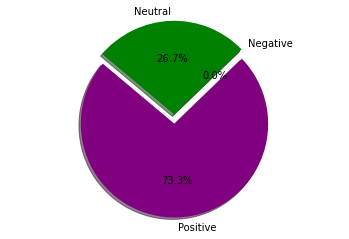

In [76]:
labels = 'Positive', 'Negative', 'Neutral'
sizes = [73.3333, 0.0, 26.6666]
colors = ['purple', 'purple', 'green']
explode = (0.1, 0, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()